#AutoML 라이브러리: pycaret

In [ ]:
#!pip install pycaret
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 14.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.2/107.2 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 13.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 86.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of flask to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

- 설치 후, 필요 시 런타임 재시작

In [ ]:
from pycaret.classification import *
#from pycaret.regression import *

In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target
df.head()

In [ ]:
clf = setup(data=df, target='target', train_size=0.8, session_id=10)

,Description,Value
0,Session id,10
1,Target,target
2,Target type,Binary
3,Original data shape,"(569, 31)"
4,Transformed data shape,"(569, 31)"
5,Transformed train set shape,"(455, 31)"
6,Transformed test set shape,"(114, 31)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


- data : 데이터셋
- target : target 지정
- train_size : 파티셔닝 시 trainset 사이즈
- session_id : random결과 고정

In [ ]:
models = compare_models(sort='Accuracy', n_select=3, fold=2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9692,0.9891,0.9895,0.9624,0.9758,0.9336,0.9343,0.1750
lightgbm,Light Gradient Boosting Machine,0.9648,0.9852,0.9755,0.9687,0.9720,0.9247,0.9248,0.7250
rf,Random Forest Classifier,0.9626,0.9824,0.9719,0.9685,0.9702,0.9201,0.9201,0.2300
catboost,CatBoost Classifier,0.9626,0.9859,0.9824,0.9589,0.9705,0.9195,0.9200,8.0900
xgboost,Extreme Gradient Boosting,0.9561,0.9841,0.9615,0.9683,0.9647,0.9065,0.9069,0.1500
ridge,Ridge Classifier,0.9516,0.9865,0.9895,0.9369,0.9625,0.8946,0.8973,0.0500
qda,Quadratic Discriminant Analysis,0.9516,0.9888,0.9509,0.9714,0.9610,0.8974,0.8979,0.0500
lda,Linear Discriminant Analysis,0.9516,0.9804,0.9965,0.9312,0.9627,0.8941,0.8985,0.0350
ada,Ada Boost Classifier,0.9494,0.9851,0.9614,0.9580,0.9597,0.8919,0.8920,0.1600
gbc,Gradient Boosting Classifier,0.9473,0.9784,0.9579,0.9579,0.9579,0.8873,0.8873,0.3000


Processing:   0%|          | 0/71 [00:00<?, ?it/s]

- sort : 평가지표
- n_select : 선택할 모형 개수
- fold : K-fold CV 지정


In [ ]:
# 랜덤포레스트 모델 생성
rf = create_model('rf', fold=2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9649,0.9890,0.9720,0.9720,0.9720,0.9250,0.9250
1,0.9604,0.9758,0.9718,0.9650,0.9684,0.9152,0.9152
Mean,0.9626,0.9824,0.9719,0.9685,0.9702,0.9201,0.9201
Std,0.0023,0.0066,0.0001,0.0035,0.0018,0.0049,0.0049


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_rf = tune_model(rf, fold=2, optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9518,0.9853,0.9650,0.9583,0.9617,0.8966,0.8966
1,0.9559,0.9822,0.9789,0.9521,0.9653,0.9051,0.9057
Mean,0.9539,0.9838,0.9720,0.9552,0.9635,0.9008,0.9012
Std,0.0021,0.0015,0.0069,0.0031,0.0018,0.0042,0.0045


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 2 folds for each of 10 candidates, totalling 20 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


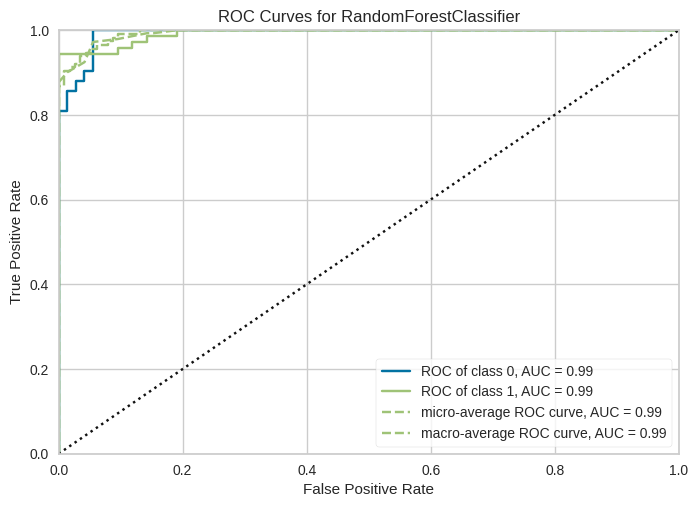

In [ ]:
# ROC 커브
plot_model(tuned_rf, 'auc')

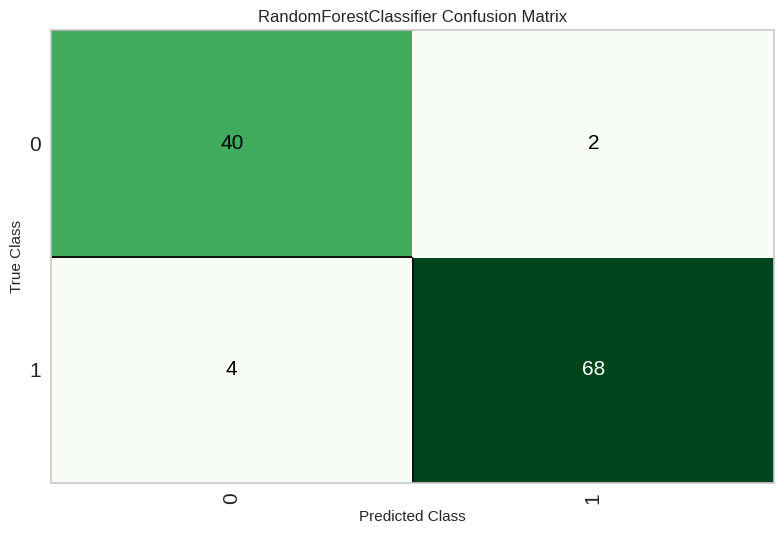

In [ ]:
# 오차 행렬
plot_model(tuned_rf, 'confusion_matrix')

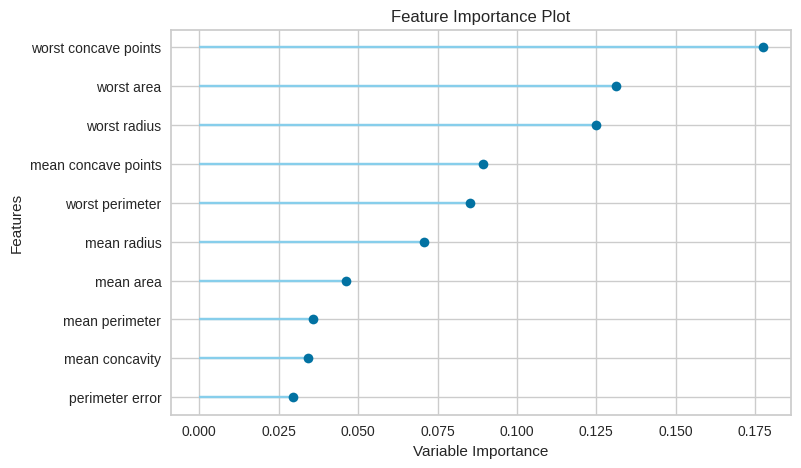

In [ ]:
# 피처 중요도
plot_model(tuned_rf, 'feature')

In [ ]:
blended = blend_models(estimator_list=models, fold=2, method='soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9693,0.9898,0.9790,0.9722,0.9756,0.9342,0.9342
1,0.9648,0.9850,0.9789,0.9653,0.9720,0.9244,0.9246
Mean,0.9670,0.9874,0.9789,0.9688,0.9738,0.9293,0.9294
Std,0.0023,0.0024,0.0001,0.0035,0.0018,0.0049,0.0048


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
pred = predict_model(blended)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9912,1.0000,0.9861,1.0000,0.9930,0.9812,0.9814


### mortdefault에 대해서 적용해보세요.

In [ ]:
!unzip mortDefault.zip

Archive:  mortDefault.zip
  inflating: mortDefault.csv         


In [ ]:
import numpy as np
data = pd.read_csv("mortDefault.csv")
data.head()
#전처리
data.creditScore.replace( {"qqq":np.nan, "@@@":np.nan}, inplace=True)
data.creditScore = data.creditScore.astype(float)

In [ ]:
from sklearn.model_selection import train_test_split
df, test = train_test_split(data, test_size=0.8, stratify = data['default'])

In [ ]:
df = pd.read_csv("sms.csv")
#df.type.value_counts()/5574

In [ ]:
clf = setup(data=df, target='type', train_size=0.8, session_id=11)

,Description,Value
0,Session id,11
1,Target,type
2,Target type,Binary
3,Original data shape,"(5574, 222)"
4,Transformed data shape,"(5574, 222)"
5,Transformed train set shape,"(4459, 222)"
6,Transformed test set shape,"(1115, 222)"
7,Numeric features,221
8,Preprocess,True
9,Imputation type,simple


- data : 데이터셋
- target : target 지정
- train_size : 파티셔닝 시 trainset 사이즈
- session_id : random결과 고정

In [ ]:
models = compare_models(sort='Recall', n_select=5, fold=2)

- sort : 평가지표
- n_select : 선택할 모형 개수
- fold : K-fold CV 지정


In [ ]:
# ------- 모델 생성
rf = create_model('svm', fold=2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9197,0.8800,0.6187,0.7400,0.6740,0.6286,0.6319
1,0.9206,0.8737,0.6254,0.7421,0.6788,0.6338,0.6369
Mean,0.9202,0.8768,0.6221,0.7410,0.6764,0.6312,0.6344
Std,0.0004,0.0031,0.0033,0.0010,0.0024,0.0026,0.0025


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
rf.get_params()   #sklearn...

*`<사용 가능한 모형>`*
- 'lr' - Logistic Regression
- 'knn' - K Neighbors Classifier
- 'nb' - Naive Bayes
- 'dt' - Decision Tree Classifier
- 'svm' - SVM - Linear Kernel
- 'rbfsvm' - SVM - Radial Kernel
- 'gpc' - Gaussian Process Classifier
- 'mlp' - MLP Classifier
- 'ridge' - Ridge Classifier
- 'rf' - Random Forest Classifier
- 'qda' - Quadratic Discriminant Analysis
- 'ada' - Ada Boost Classifier
- 'gbc' - Gradient Boosting Classifier
- 'lda' - Linear Discriminant Analysis
- 'et' - Extra Trees Classifier
- 'xgboost' - Extreme Gradient Boosting
- 'lightgbm' - Light Gradient Boosting Machine
- 'catboost' - CatBoost Classifier

In [ ]:
tuned_rf = tune_model(rf, fold=2, optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8901,0.7279,0.5050,0.6089,0.5521,0.4901,0.4929
1,0.8955,0.7381,0.5284,0.6320,0.5756,0.5165,0.5192
Mean,0.8928,0.7330,0.5167,0.6204,0.5638,0.5033,0.5061
Std,0.0027,0.0051,0.0117,0.0116,0.0117,0.0132,0.0132


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 2 folds for each of 10 candidates, totalling 20 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
#sms.csv->pycaret으로 분류 모델링 해보세요~

In [ ]:
#RandomForest인 경우 parameter 예시
params = {    'n_estimators': [90,100],
    'max_depth': [3,4],
    'max_features': [2, 3]}

tuned_rf = tune_model(rf, fold=2, optimize='Accuracy', n_iter=5, custom_grid = params)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9767,0.9386,0.1081,0.6903,0.1870,0.1815,0.2673
1,0.9768,0.9439,0.1228,0.6639,0.2072,0.2011,0.2790
Mean,0.9768,0.9412,0.1155,0.6771,0.1971,0.1913,0.2731
Std,0.0000,0.0026,0.0073,0.0132,0.0101,0.0098,0.0059


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 2 folds for each of 5 candidates, totalling 10 fits


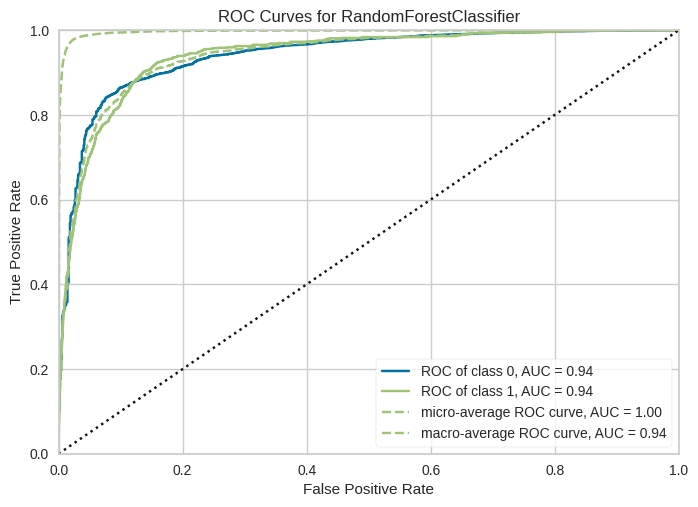

In [ ]:
# ROC 커브
plot_model(tuned_rf, 'auc')

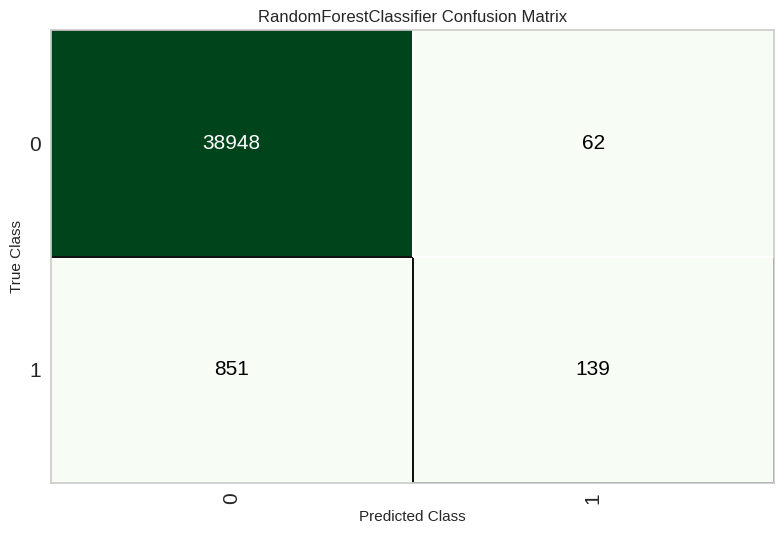

In [ ]:
# 오차 행렬
plot_model(tuned_rf, 'confusion_matrix')

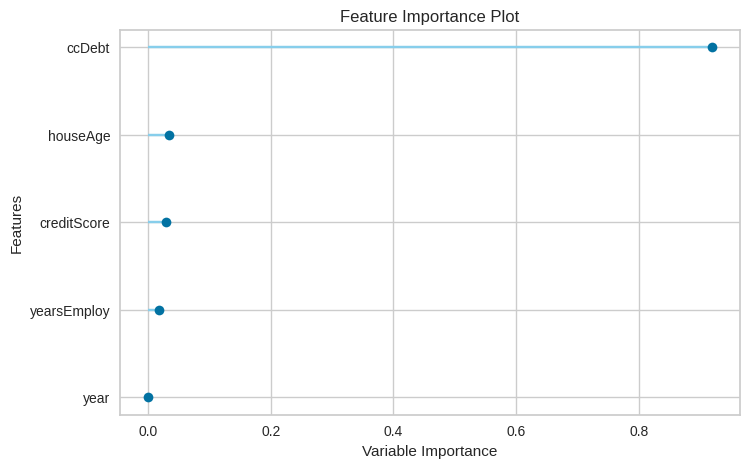

In [ ]:
# 피처 중요도
plot_model(tuned_rf, 'feature')

In [ ]:
blended = blend_models(estimator_list=models, fold=2, method='soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9772,0.9535,0.1622,0.6591,0.2603,0.2530,0.3196
1,0.9775,0.9548,0.1733,0.6725,0.2756,0.2682,0.3341
Mean,0.9773,0.9541,0.1678,0.6658,0.2680,0.2606,0.3269
Std,0.0001,0.0006,0.0056,0.0067,0.0076,0.0076,0.0072


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
pred = predict_model(blended, data=test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9774,0.9530,0.1658,0.6750,0.2662,0.2589,0.3273


In [ ]:
pred = predict_model(tuned_rf, data=test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9771,0.9415,0.1380,0.6873,0.2299,0.2235,0.3014


In [ ]:
pred.head()

,creditScore,houseAge,yearsEmploy,ccDebt,year,default,prediction_label,prediction_score
921332,744,23.0,6.0,1857,2009,0,0,0.9963
212708,709,34.0,3.0,5867,2009,0,0,0.9932
214070,710,18.0,2.0,6134,2009,0,0,0.9914
209280,643,38.0,6.0,3981,2009,0,0,0.9928
638538,833,23.0,1.0,8104,2009,1,0,0.7951


In [ ]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
finalize_model(tuned_rf)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['houseAge', 'yearsEmploy',
                                             'ccDebt', 'year'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean'))),
                ('categorical_imputer',
                 TransformerWrapper(exclude=None, include=['...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=4, max_features=3,
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        monotonic_cst=None, n_estimators=100,
                                        n_jobs=-1, oob_score=False,
                                        random_state=11, verbose=0,
                                        warm_start=False))],
         verbose=False)

In [ ]:
save_model(tuned_rf, 'my_best_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['houseAge', 'yearsEmploy',
                                              'ccDebt', 'year'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None, include=['...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, 

In [ ]:
from pycaret.datasets import get_data
data = get_data('juice')

#target: Purchase
clf = setup( data=data, target='Purchase', session_id=123 )
models = compare_models(sort='Accuracy', n_select=5, fold=2)

In [ ]:
tuned = [tune_model(i) for i in  models]
blended = blend_models(estimator_list=tuned[2:5], fold=2, method='soft')

In [ ]:
finalized = finalize_model( blended)
predict_model(finalized, data=data)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9159,0.9786,0.9159,0.9225,0.9166,0.8274,0.8322


,Id,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,...,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE,Purchase,prediction_label,prediction_score
0,1,237,1,1.75,1.99,0.00,0.00,0,0,0.500000,...,1.75,0.24,No,0.000000,0.000000,0.24,1,CH,CH,0.6566
1,2,239,1,1.75,1.99,0.00,0.30,0,1,0.600000,...,1.75,-0.06,No,0.150754,0.000000,0.24,1,CH,CH,0.5855
2,3,245,1,1.86,2.09,0.17,0.00,0,0,0.680000,...,1.69,0.40,No,0.000000,0.091398,0.23,1,CH,CH,0.8828
3,4,227,1,1.69,1.69,0.00,0.00,0,0,0.400000,...,1.69,0.00,No,0.000000,0.000000,0.00,1,MM,MM,0.8021
4,5,228,7,1.69,1.69,0.00,0.00,0,0,0.956535,...,1.69,0.00,Yes,0.000000,0.000000,0.00,0,CH,CH,0.9236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,1066,252,7,1.86,2.09,0.10,0.00,0,0,0.587822,...,1.76,0.33,Yes,0.000000,0.053763,0.23,0,CH,CH,0.7904
1066,1067,256,7,1.86,2.18,0.00,0.00,0,0,0.670258,...,1.86,0.32,Yes,0.000000,0.000000,0.32,0,CH,CH,0.8251
1067,1068,257,7,1.86,2.18,0.00,0.00,0,0,0.736206,...,1.86,0.32,Yes,0.000000,0.000000,0.32,0,MM,CH,0.5631
1068,1069,261,7,1.86,2.13,0.00,0.24,0,0,0.588965,...,1.86,0.03,Yes,0.112676,0.000000,0.27,0,CH,CH,0.7724


###탐색 알고리즘 변경

In [ ]:
#!pip install pycaret[tuners]
!pip install optuna

In [ ]:
#dt
dt = create_model('dt', fold=2)

#tune model optuna
tune_model(dt, search_library = 'optuna')

# tune model scikit-optimize
tune_model(dt, search_library = 'scikit-optimize')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9640,0.6358,0.2906,0.2799,0.2851,0.2667,0.2667
1,0.9643,0.6448,0.3087,0.2908,0.2995,0.2812,0.2813
Mean,0.9641,0.6403,0.2996,0.2854,0.2923,0.2739,0.2740
Std,0.0002,0.0045,0.0091,0.0054,0.0072,0.0073,0.0073


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9764,0.8545,0.1418,0.5895,0.2286,0.2211,0.2813
1,0.9775,0.8854,0.1797,0.6636,0.2829,0.2752,0.3378
2,0.9771,0.8648,0.1692,0.6442,0.2680,0.2604,0.3225
3,0.9767,0.8613,0.1540,0.6162,0.2465,0.2389,0.3004
4,0.9774,0.8871,0.1566,0.6889,0.2551,0.2483,0.3215
5,0.9790,0.8785,0.2172,0.7679,0.3386,0.3313,0.4016
6,0.9766,0.8739,0.1641,0.5963,0.2574,0.2494,0.3047
7,0.9774,0.8747,0.1591,0.6923,0.2587,0.2518,0.3250
8,0.9764,0.8712,0.1439,0.5938,0.2317,0.2242,0.2845


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

INFO:optuna_integration.sklearn.sklearn:Searching the best hyperparameters using 160000 samples...
INFO:optuna_integration.sklearn.sklearn:Finished hyperparameter search!


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9764,0.9340,0.1418,0.5895,0.2286,0.2211,0.2813
1,0.9775,0.9493,0.1797,0.6636,0.2829,0.2752,0.3378
2,0.9771,0.9399,0.1692,0.6442,0.2680,0.2604,0.3225
3,0.9767,0.9454,0.1540,0.6162,0.2465,0.2389,0.3004
4,0.9774,0.9505,0.1566,0.6889,0.2551,0.2483,0.3215
5,0.9790,0.9526,0.2172,0.7679,0.3386,0.3313,0.4016
6,0.9750,0.9447,0.2449,0.4899,0.3266,0.3153,0.3351
7,0.9774,0.9437,0.1591,0.6923,0.2587,0.2518,0.3250
8,0.9764,0.9396,0.1439,0.5938,0.2317,0.2242,0.2845


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=0.9155817872365756,
                       max_leaf_nodes=None,
                       min_impurity_decrease=0.00037716231562011517,
                       min_samples_leaf=4, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, monotonic_cst=None,
                       random_state=11, splitter='best')